In [1]:
from  bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import matplotlib as plt

In [2]:
Lebron_Df = pd.read_csv('Lebron_Game_Stats.csv')
Lebron_Df.drop(columns=['Unnamed: 0','GS'],inplace = True)
Lebron_Df

,G,Date,Age,Tm,Location,Opp,Margin,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2003-10-29,18,CLE,@,SAC,L (-14),42:50,12,20,...,4,6,9,4,0,2,3,25,24.7,-9
1,2,2003-10-30,18,CLE,@,PHO,L (-9),40:21,8,17,...,10,12,8,1,0,7,1,21,14.7,-3
2,3,2003-11-01,18,CLE,@,POR,L (-19),39:10,3,12,...,4,4,6,2,0,2,3,8,5.0,-21
3,4,2003-11-05,18,CLE,H,DEN,L (-4),41:06,3,11,...,9,11,7,2,3,2,1,7,11.2,-3
4,5,2003-11-07,18,CLE,@,IND,L (-1),43:44,8,18,...,5,5,3,0,0,7,2,23,9.0,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,51,2019-03-17,34,LAL,@,NYK,L (-1),35:00,11,26,...,4,6,8,0,1,2,2,33,24.5,9
1194,52,2019-03-22,34,LAL,H,BRK,L (-5),36:42,8,25,...,6,9,14,1,1,8,3,25,15.3,-2
1195,53,2019-03-24,34,LAL,H,SAC,W (+5),35:16,9,22,...,9,11,11,2,1,4,1,29,26.9,5
1196,54,2019-03-26,34,LAL,H,WAS,W (+18),33:54,11,20,...,7,7,14,1,0,3,1,23,22.1,3


In [3]:
Lebron_Df['Margin']=Lebron_Df['Margin'].apply(lambda row: row.split('(')[0].strip())
Lebron_Df['Date']=pd.to_datetime(Lebron_Df['Date'], format="%Y-%m-%d")
Lebron_Df['MP']=Lebron_Df['MP'].apply(lambda row: row.split(':')[0].strip())
Lebron_Df

,G,Date,Age,Tm,Location,Opp,Margin,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,2003-10-29,18,CLE,@,SAC,L,42,12,20,...,4,6,9,4,0,2,3,25,24.7,-9
1,2,2003-10-30,18,CLE,@,PHO,L,40,8,17,...,10,12,8,1,0,7,1,21,14.7,-3
2,3,2003-11-01,18,CLE,@,POR,L,39,3,12,...,4,4,6,2,0,2,3,8,5.0,-21
3,4,2003-11-05,18,CLE,H,DEN,L,41,3,11,...,9,11,7,2,3,2,1,7,11.2,-3
4,5,2003-11-07,18,CLE,@,IND,L,43,8,18,...,5,5,3,0,0,7,2,23,9.0,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,51,2019-03-17,34,LAL,@,NYK,L,35,11,26,...,4,6,8,0,1,2,2,33,24.5,9
1194,52,2019-03-22,34,LAL,H,BRK,L,36,8,25,...,6,9,14,1,1,8,3,25,15.3,-2
1195,53,2019-03-24,34,LAL,H,SAC,W,35,9,22,...,9,11,11,2,1,4,1,29,26.9,5
1196,54,2019-03-26,34,LAL,H,WAS,W,33,11,20,...,7,7,14,1,0,3,1,23,22.1,3


In [4]:
Lebron_Df['MP']=Lebron_Df["MP"].astype(str).astype(int)

## Yearly Averages

In [5]:
years = Lebron_Df.Date.dt.year.unique()
years

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019])

In [15]:
over_25shots = Lebron_Df[Lebron_Df.FGA > 25]

over_25shots['PTS'].min()

loss_games = Lebron_Df[Lebron_Df.Margin == 'L']
win_games = Lebron_Df[]


23

In [7]:
import datetime 
yearly_Stats = []
for year in years:
    yearly_Stats.append(Lebron_Df[(Lebron_Df['Date']>datetime.date(year, 10, 10)) & (Lebron_Df['Date']<datetime.date(year+1, 4, 20))])

yearly_Stats[0].groupby('Opp')['PTS'].mean().plot(kind='bar',colors = ['r', 'g', 'b', 'y'])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


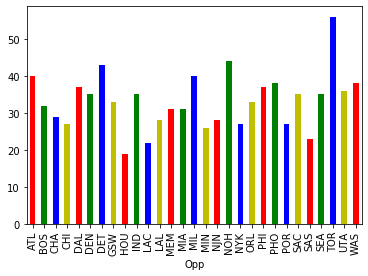

In [8]:
yearly_Stats[1].groupby('Opp')['PTS'].mean().plot(kind='bar',colors = ['r', 'g', 'b', 'y'])
yearly_Stats[1].groupby('Opp')['PTS'].max().plot(kind='bar',colors = ['r', 'g', 'b', 'y'])

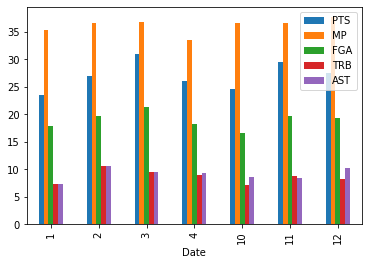

In [9]:
yearly_Stats[14].groupby(yearly_Stats[14]['Date'].dt.month)['PTS','MP','FGA','TRB','AST'].mean().plot(kind='bar')

In [10]:
yearly_Stats[7].groupby('Margin')['PTS','TRB','AST','FGA'].mean()

,PTS,TRB,AST,FGA
Margin,,,,
L,26.227273,7.727273,6.863636,20.181818
W,26.912281,7.368421,7.070175,18.263158
